### This notebook is for Separate Random Forest Models

In [ ]:
# Import all the necessary packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(year):
    # Load the dataset
    DATA_PATH = os.getcwd()
    dataset_name = f"analytic_data{year}.csv"
    FULL_PATH = os.path.join(DATA_PATH, 'data', "CHR Analytic Datasets", dataset_name)
    data = pd.read_csv(FULL_PATH, low_memory=False)
    data = data[1:]
    print(data.head(5))
    return data

In [ ]:
def clean_data_and_drop_non_county(data):
    # Drop rows with any NaN values
    #data = data.dropna()
    
    # Filter rows where 'County Ranked (Yes=1/No=0)' is 1
    data = data[data["County Ranked (Yes=1/No=0)"] == '1']
    
    #Add Potential Ways to fill in the None/Nah 
    
    return data

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

def get_stats(data):
    print("Data type before any operation:", type(data))
    
    # Convert all data to float, coercing errors which turns bad values to NaN
    data = pd.to_numeric(data, errors='coerce')
    
    # Drop all NaN values for accurate statistical calculation
    data = data.dropna()

    if data.empty:
        print("Data is empty after cleaning.")
        return pd.DataFrame()

    # Calculate basic statistics
    mean = data.mean()
    median = np.median(data)
    variance = np.var(data)
    std_deviation = np.std(data)
    min_value = np.min(data)
    max_value = np.max(data)

    # Calculate mode
    mode_result = stats.mode(data)
    mode = mode_result.mode[0] if mode_result.count.size > 0 and mode_result.count[0] > 0 and mode_result.mode.size > 0 else None

    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    df_statistics = pd.DataFrame({
        "Mean": [mean],
        "Median": [median],
        "Mode": [mode],
        "Variance": [variance],
        "Standard Deviation": [std_deviation],
        "Minimum": [min_value],
        "Maximum": [max_value],
        "Skewness": [skewness],
        "Kurtosis": [kurtosis]
    })
    return df_statistics

In [ ]:
data = load_data(year="2023_0")
clean_data_and_drop_non_county(data).head()

In [ ]:
get_stats(data['Adult Obesity raw value'])

In [64]:
columns = ['Adult Obesity raw value', 'Physical Inactivity raw value', 'Diabetes Prevalence raw value', '% Non-Hispanic Black raw value', '% 65 and Older raw value', 'Food Insecurity raw value', 'Severe Housing Problems raw value', 'Uninsured raw value', 'Frequent Physical Distress raw value', 'Frequent Mental Distress raw value', 'Food Environment Index raw value', 'Limited Access to Healthy Foods raw value', 'Poor Physical Health Days raw value', 'Poor Mental Health Days raw value', 'Primary Care Physicians raw value', 'Poor or Fair Health raw value', 'Life Expectancy raw value', 'Premature Age-Adjusted Mortality raw value']
data = data[columns]
data.head()

,Adult Obesity raw value,Physical Inactivity raw value,Diabetes Prevalence raw value,% Non-Hispanic Black raw value,% 65 and Older raw value,Food Insecurity raw value,Severe Housing Problems raw value,Uninsured raw value,Frequent Physical Distress raw value,Frequent Mental Distress raw value,Food Environment Index raw value,Limited Access to Healthy Foods raw value,Poor Physical Health Days raw value,Poor Mental Health Days raw value,Primary Care Physicians raw value,Poor or Fair Health raw value,Life Expectancy raw value,Premature Age-Adjusted Mortality raw value
3,0.373,0.264,0.106,0.2073102631,0.1604873509,0.145,0.1444262678,0.1055942098,0.107,0.162,6.6,0.1302099797,3.4322111963,4.7973512632,0.0004452756,0.169,76.585649727,427.07332591
4,0.326,0.232,0.097,0.0836794905,0.2146982373,0.124,0.1223897195,0.1087488083,0.099,0.161,7.5,0.0793677936,3.2761769521,4.7537497106,0.0006542019,0.149,77.724729177,381.70203137
5,0.464,0.357,0.156,0.473962506,0.1997676654,0.195,0.1621187801,0.1436827544,0.149,0.18,5.8,0.1043317167,4.6054318631,4.9548545646,0.0003253487,0.275,72.867210115,589.56609455
6,0.384,0.316,0.122,0.213284691,0.1673710904,0.164,0.1132075472,0.1300787792,0.127,0.174,7.4,0.0044586621,4.0121820779,5.364779234,0.0006324539,0.216,73.609363092,567.50814595
7,0.327,0.285,0.109,0.0163276367,0.1872597009,0.138,0.0988246582,0.1325467229,0.119,0.174,7.8,0.0251220602,3.8660480758,5.377579831,0.0002073291,0.184,74.1714626,532.83648174


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_Plots(data, year):
    #Setting up the aesthetic style of the plots
    sns.set(style="whitegrid")
    # Plotting distributions of each variable
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    axs = axs.flatten()
    for i, col in enumerate(data.columns):
        sns.histplot(data[col], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'plots/{year}/random_Forest_model.png')

In [ ]:
# Overview of relevant columns
print(data[['Name', 'Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].head())
print(data[['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].describe())

In [57]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def load_data(year):
    DATA_PATH = os.getcwd()
    dataset_name = f"analytic_data{year}.csv"
    FULL_PATH = os.path.join(DATA_PATH, 'data', "CHR Analytic Datasets", dataset_name)
    data = pd.read_csv(FULL_PATH, low_memory=False)
    data = data[1:]  # Assuming the first row needs to be skipped (often header or formatting row)
    print("Data loaded successfully.")
    return data

def clean_data_and_drop_non_county(data):
    data = data[data["County Ranked (Yes=1/No=0)"] == '1']
    print("Data cleaned: Non-county rows dropped.")
    return data

def get_stats(data, filename):
    # Convert all columns to numeric, coercing errors which turns bad values to NaN
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

    stats_dict = {}
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            # Calculate basic statistics
            mode_result = stats.mode(data[column].dropna())
            mode = mode_result.mode[0] if mode_result.count.size > 0 else None
            stats_dict[column] = {
                "Mean": data[column].mean(),
                "Median": np.median(data[column].dropna()),
                "Mode": mode,
                "Variance": np.var(data[column]),
                "Standard Deviation": np.std(data[column]),
                "Minimum": np.min(data[column]),
                "Maximum": np.max(data[column]),
                "Skewness": stats.skew(data[column]),
                "Kurtosis": stats.kurtosis(data[column])
            }
    stats_df = pd.DataFrame(stats_dict).transpose()
    stats_df.to_csv(f"{filename}_stats.csv", sep='\t')
    print("Statistics saved to file.")
    return stats_df

def generate_and_save_plots(data, year):
    os.makedirs(f'plots/{year}', exist_ok=True)
    sns.set(style="whitegrid")
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            plt.figure(figsize=(10, 6))
            sns.histplot(data[column], kde=True)
            plt.title(f'Distribution of {column}')
            plt.ylabel('Frequency')
            plt.xlabel(column)
            plt.savefig(f'plots/{year}/{column}_distribution.png')
            plt.close()
    print("All plots saved successfully.")

# Example usage
year = "2023_0"
data = load_data(year)
data = clean_data_and_drop_non_county(data)
stats_df = get_stats(data, year)
generate_and_save_plots(data, year)

Data loaded successfully.
Data cleaned: Non-county rows dropped.


IndexError: invalid index to scalar variable.

In [58]:
import numpy as np
import pandas as pd
from scipy import stats

def get_stats(data, filename):
    # Convert all columns to numeric, coercing errors which turns bad values to NaN
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

    stats_dict = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            cleaned_data = data[column].dropna()
            if not cleaned_data.empty:
                mode_result = stats.mode(cleaned_data)
                mode = mode_result.mode[0] if mode_result.count.size > 0 and mode_result.mode.size > 0 else None
                stats_dict[column] = {
                    "Mean": cleaned_data.mean(),
                    "Median": np.median(cleaned_data),
                    "Mode": mode,
                    "Variance": np.var(cleaned_data),
                    "Standard Deviation": np.std(cleaned_data),
                    "Minimum": np.min(cleaned_data),
                    "Maximum": np.max(cleaned_data),
                    "Skewness": stats.skew(cleaned_data),
                    "Kurtosis": stats.kurtosis(cleaned_data)
                }
            else:
                stats_dict[column] = {
                    "Mean": None,
                    "Median": None,
                    "Mode": None,
                    "Variance": None,
                    "Standard Deviation": None,
                    "Minimum": None,
                    "Maximum": None,
                    "Skewness": None,
                    "Kurtosis": None
                }

    stats_df = pd.DataFrame(stats_dict).transpose()
    stats_df.to_csv(f"{filename}_stats.txt", sep='\t')
    print("Statistics saved to file.")
    return stats_df

In [62]:
import pandas as pd
import os

def simplified_get_stats(data, filename):
    # Ensuring all data is numeric, coercing errors to NaN
    numeric_data = data.select_dtypes(include=[np.number])
    description = numeric_data.describe()

    # Adding variance, skew, and kurtosis
    description.loc['variance'] = numeric_data.var()
    description.loc['skewness'] = numeric_data.skew()
    description.loc['kurtosis'] = numeric_data.kurt()

    # Save to file
    output_path = os.path.join('output', f"{filename}_stats.txt")
    os.makedirs('output', exist_ok=True)
    description.to_csv(output_path, sep='\t')
    print(f"Statistics saved to file: {output_path}")

    return description

# Usage
year = "2023_0"
data = load_data(year)
data = clean_data_and_drop_non_county(data)
print(data.head())
stats_df = simplified_get_stats(data['Adult Obesity raw value'], year)
print(stats_df)

Data loaded successfully.
Data cleaned: Non-county rows dropped.
  State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
3  Autauga County         2023                          1   
4  Baldwin County         2023                          1   
5  Barbour County         2023                          1   
6     Bibb County         2023                          1   
7   Blount County         2023                          1   

  Premature Death raw value Premature Death numerator  \
3              8027.3947267                       836   
4  

AttributeError: 'Series' object has no attribute 'select_dtypes'

In [76]:
# Calculate Statistics
def get_stats(data, filename):
    # Convert all columns to numeric, coercing errors which turns bad values to NaN
    data = data.apply(pd.to_numeric, errors='coerce')
    description = data.describe(include='all').transpose()
    description['variance'] = data.var()
    description['skewness'] = data.skew()
    description['kurtosis'] = data.kurt()

    # Save to file
    os.makedirs('output', exist_ok=True)
    output_path = os.path.join('output', f"{filename}_stats.csv")
    description.to_csv(output_path, sep='\t')
    print(f"Statistics saved to file: {output_path}")
    return description

# Generate and Save Plots
def generate_and_save_plots(data, year):
    numeric_data = data.select_dtypes(include=[np.number])
    os.makedirs(f'plots/{year}', exist_ok=True)
    print("TRYING!")
    print(numeric_data.columns)
    sns.set(style="whitegrid")
    for column in numeric_data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(numeric_data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xlabel(column)
        print("Success!")
        plt.savefig(f'plots/{year}/{column}_distribution.png')
        plt.show() 
        plt.close() 
    print("All plots saved successfully.") 

In [73]:
stats_df = get_stats(data, year)
print(stats_df)
generate_and_save_plots(data, year)

Statistics saved to file: output/2023_0_stats.csv
                                             count        mean         std  \
Adult Obesity raw value                     3081.0    0.362715    0.046569   
Physical Inactivity raw value               3081.0    0.257896    0.051865   
Diabetes Prevalence raw value               3081.0    0.105095    0.022033   
% Non-Hispanic Black raw value              3082.0    0.092068    0.143004   
% 65 and Older raw value                    3082.0    0.199312    0.046919   
Food Insecurity raw value                   3082.0    0.124804    0.037001   
Severe Housing Problems raw value           3082.0    0.131149    0.043390   
Uninsured raw value                         3082.0    0.118166    0.051686   
Frequent Physical Distress raw value        3081.0    0.109978    0.021471   
Frequent Mental Distress raw value          3081.0    0.157779    0.020169   
Food Environment Index raw value            3050.0    7.447934    1.123775   
Limited Access

In [79]:
def generate_and_save_plots(data, year):
    #numeric_data = data.select_dtypes(include=[np.number])
    os.makedirs(f'plots/{year}', exist_ok=True)
    print("TRYING!")
    sns.set(style="whitegrid")
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xlabel(column)
        print("Success!")
        plt.savefig(f'plots/{year}/{column}_distribution.png')
        plt.show() 
        plt.close() 
    print("All plots saved successfully.")

TRYING!
Success!


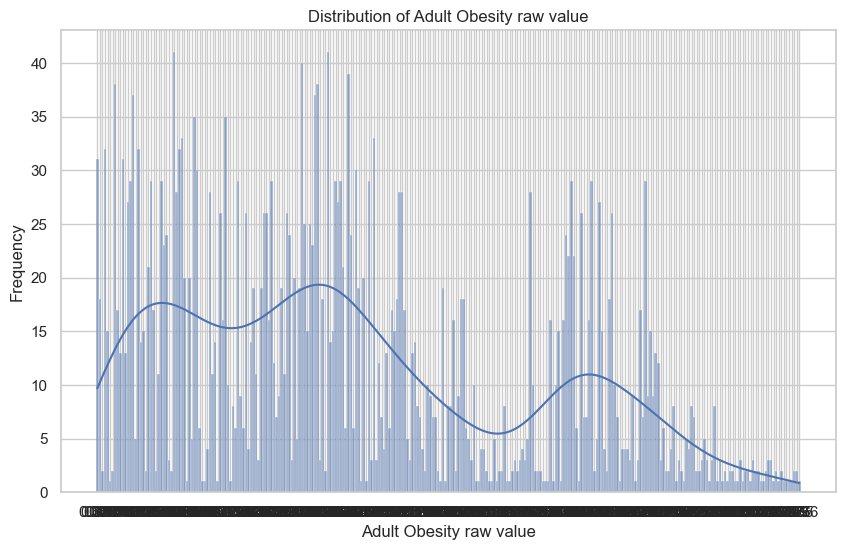

Success!


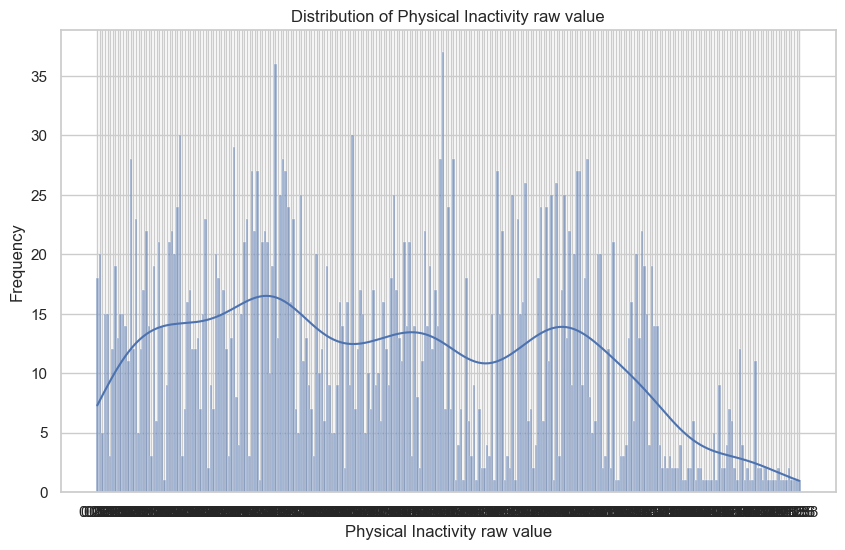

Success!


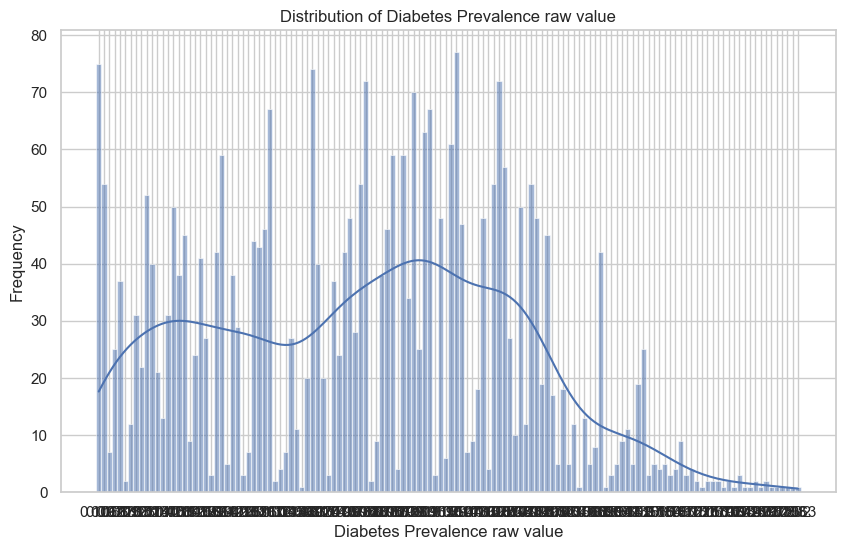

Success!


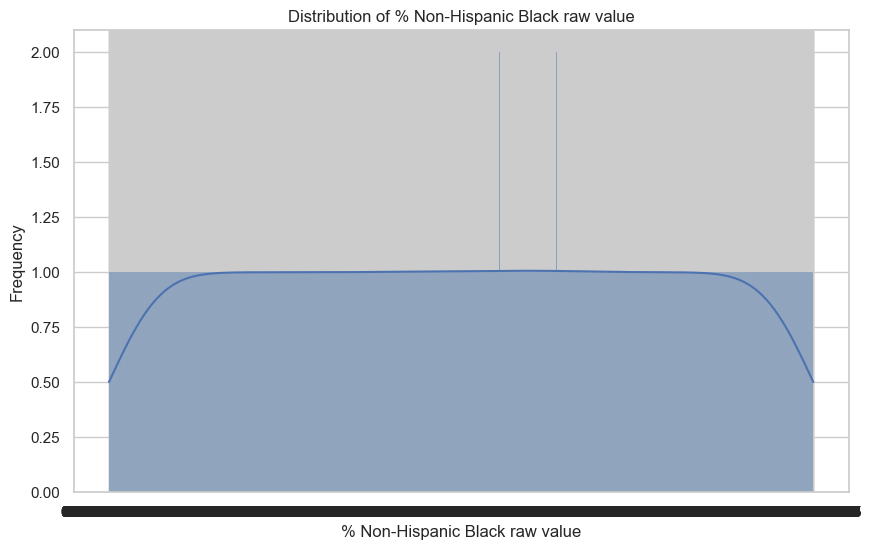

Success!


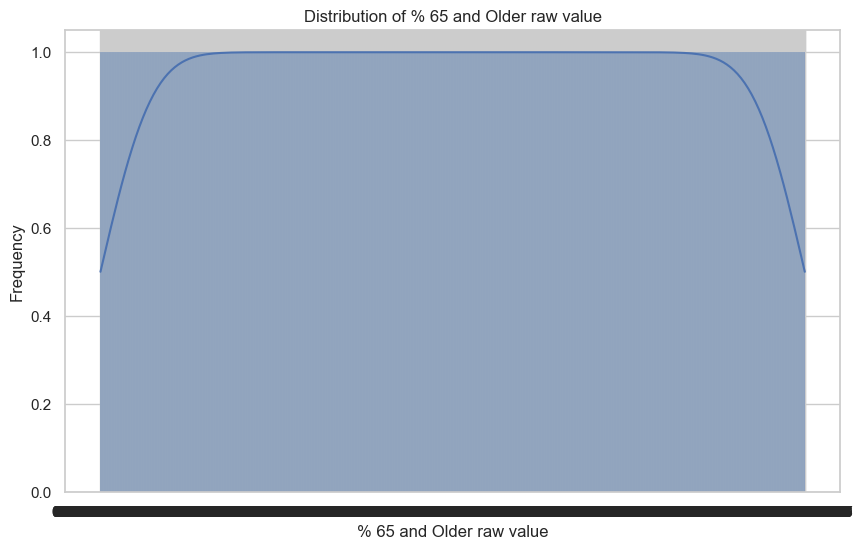

Success!


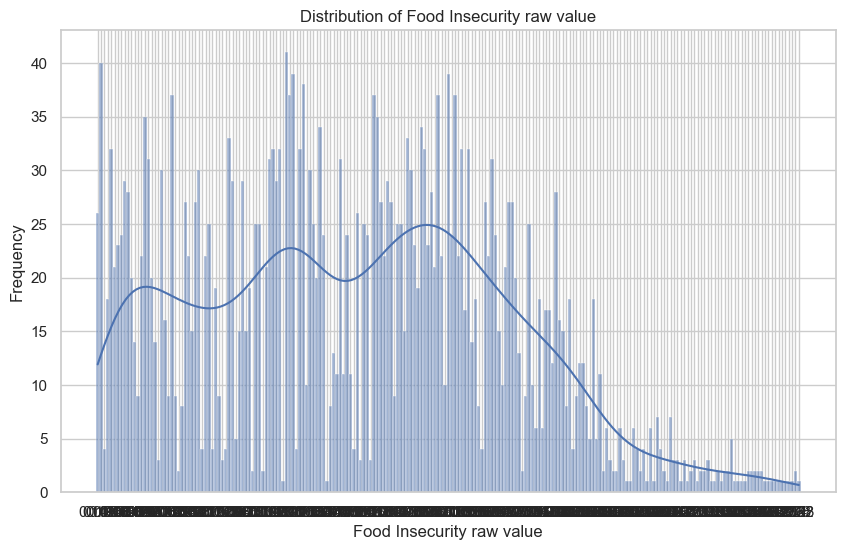

Success!


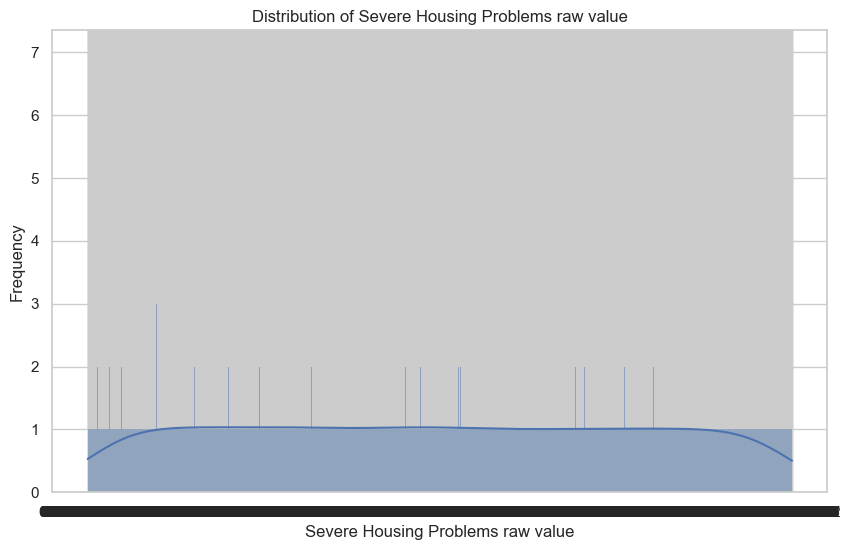

Success!


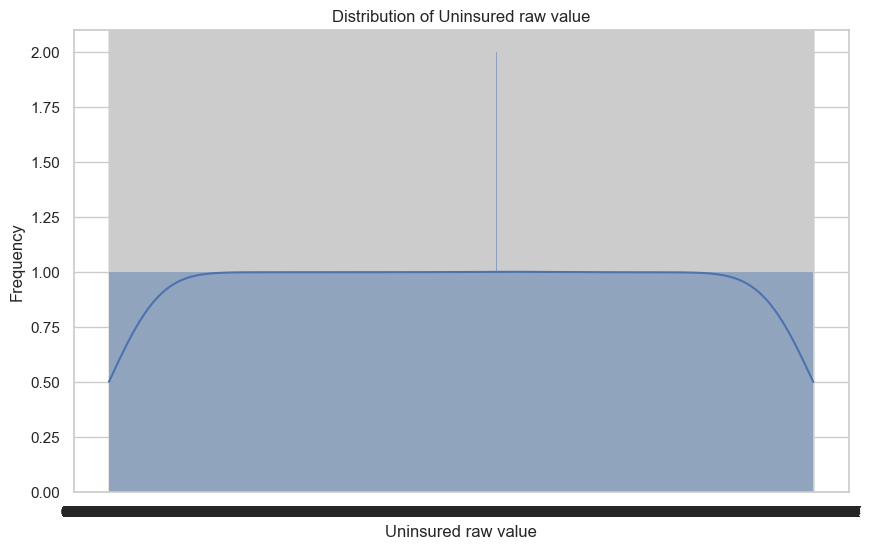

Success!


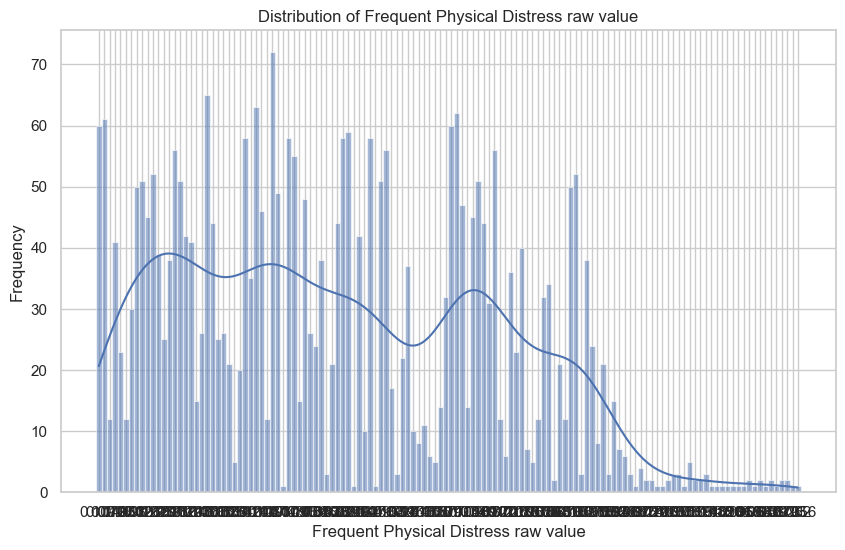

Success!


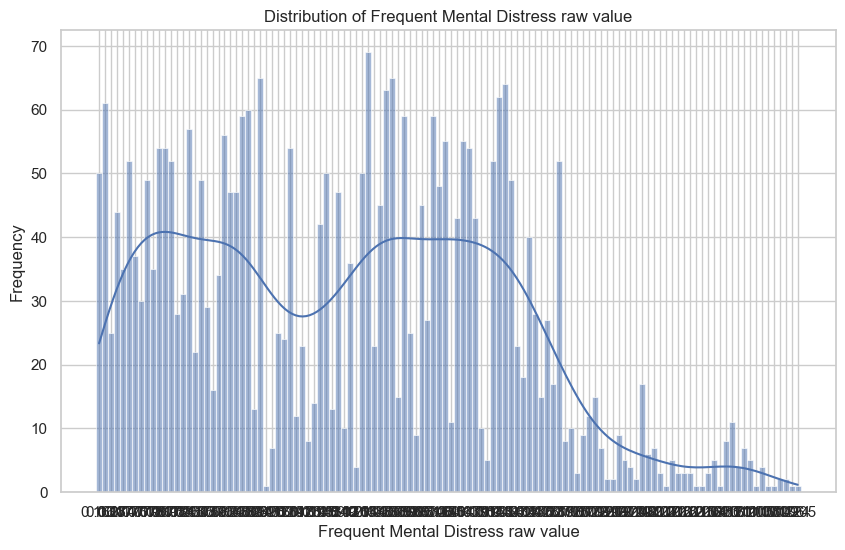

Success!


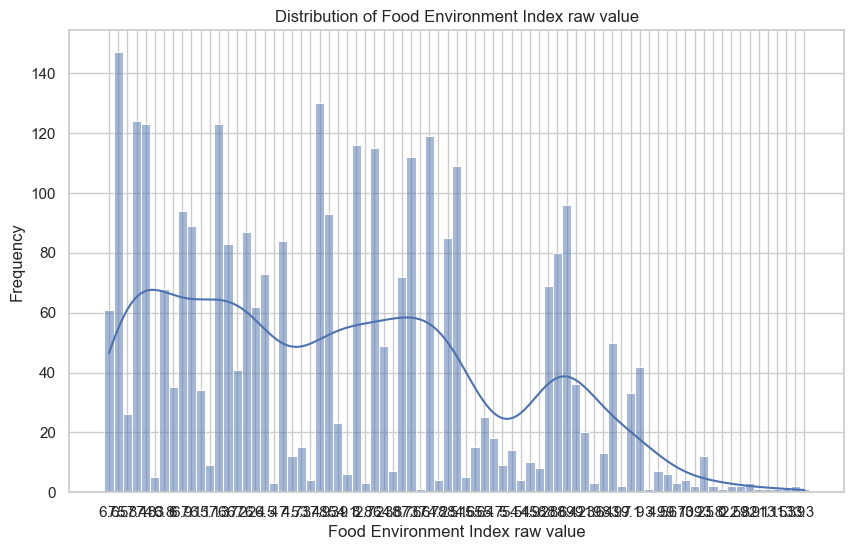

Success!


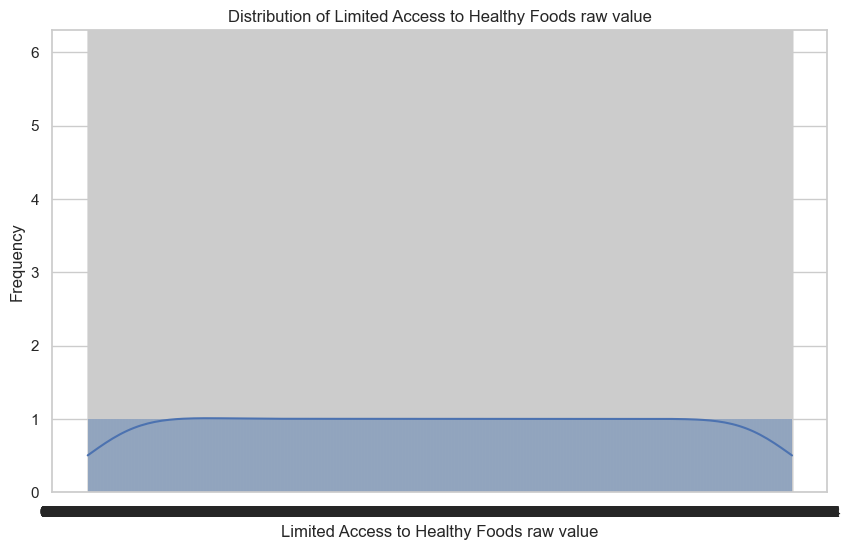

Success!


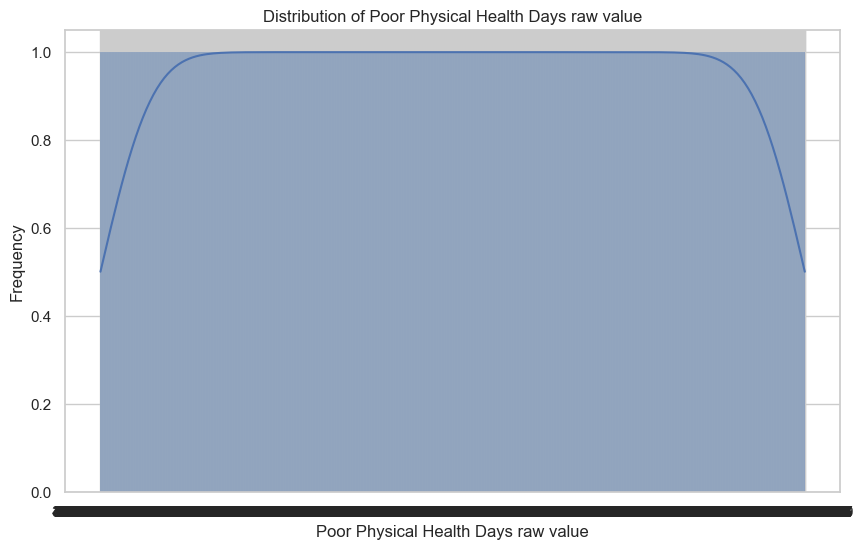

Success!


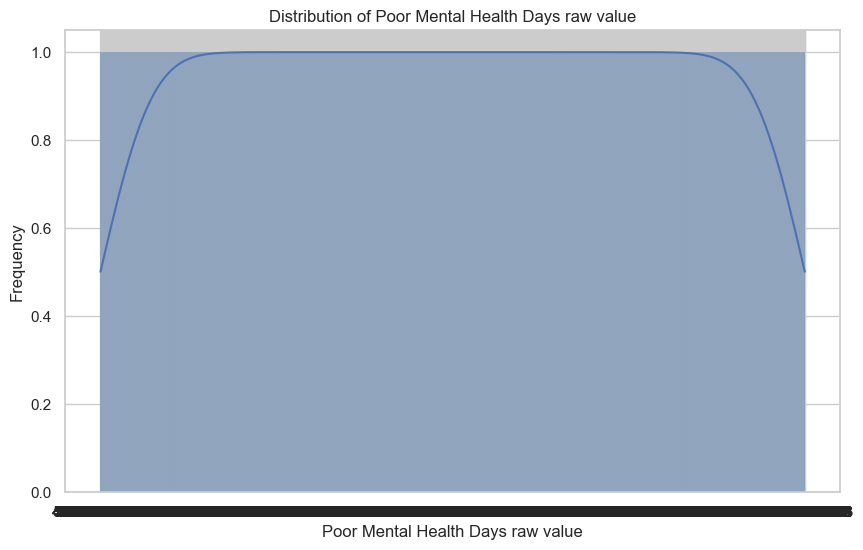

Success!


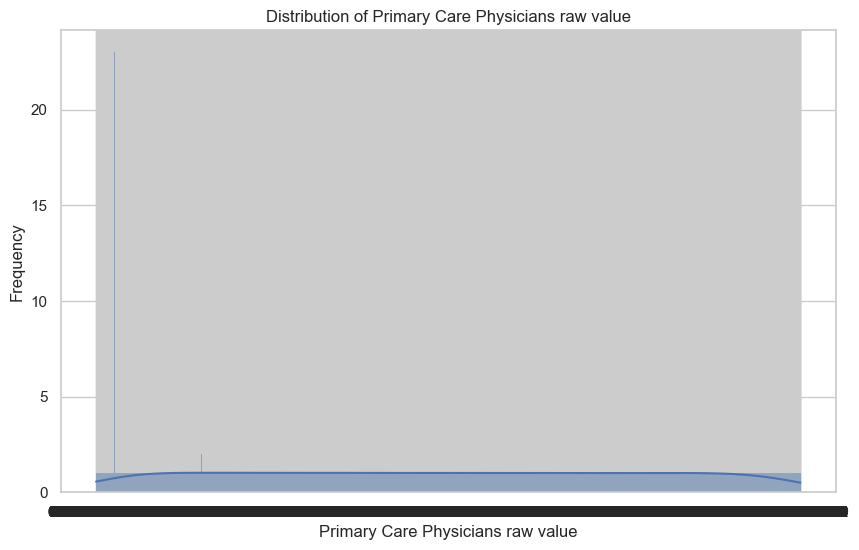

Success!


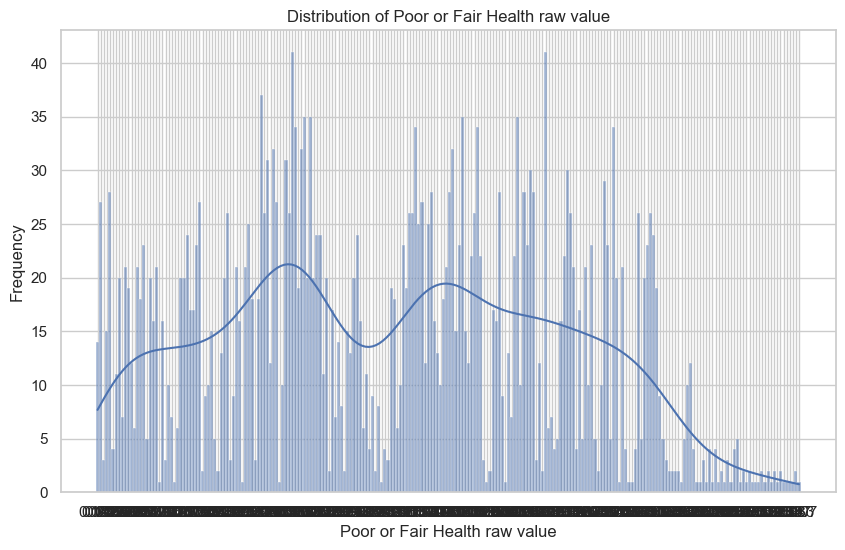

Success!


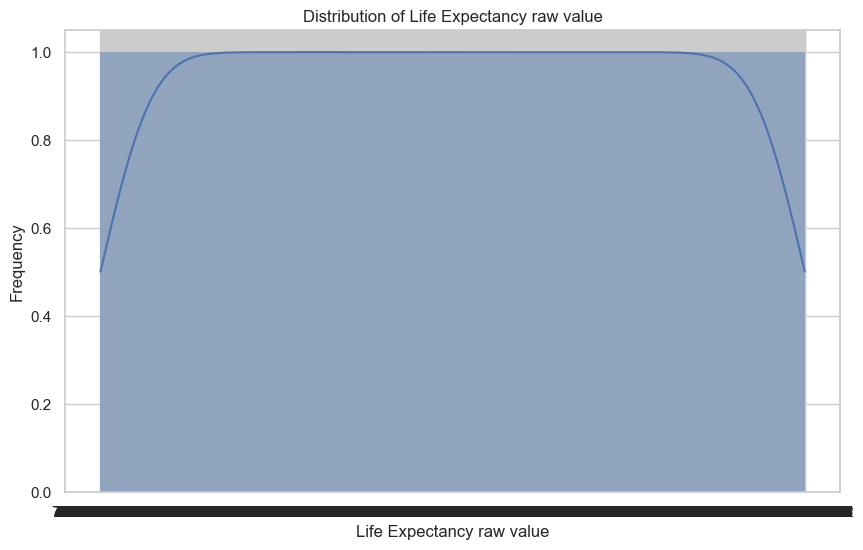

Success!


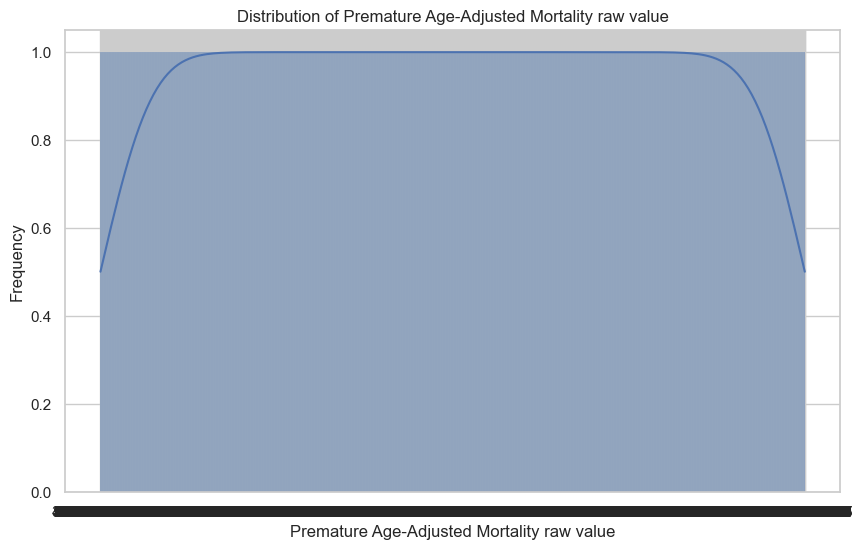

All plots saved successfully.


In [80]:
generate_and_save_plots(data, year)

In [89]:
def generate_and_save_plots(data, year):
    os.makedirs(f'plots/{year}', exist_ok=True)
    sns.set(style="whitegrid")
    for column in data.columns:
        plt.figure(figsize=(20, 10))
        sns.histplot(data[column], bins=100, kde=True)
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xlabel(column)
        plt.xticks(rotation=90)
        plt.savefig(f'plots/{year}/{column}_distribution.png')
        plt.close()
    print("All plots saved successfully.")

In [93]:
generate_and_save_plots(data, year)

All plots saved successfully.


In [86]:
data.head()

,Adult Obesity raw value,Physical Inactivity raw value,Diabetes Prevalence raw value,% Non-Hispanic Black raw value,% 65 and Older raw value,Food Insecurity raw value,Severe Housing Problems raw value,Uninsured raw value,Frequent Physical Distress raw value,Frequent Mental Distress raw value,Food Environment Index raw value,Limited Access to Healthy Foods raw value,Poor Physical Health Days raw value,Poor Mental Health Days raw value,Primary Care Physicians raw value,Poor or Fair Health raw value,Life Expectancy raw value,Premature Age-Adjusted Mortality raw value
3,0.373,0.264,0.106,0.2073102631,0.1604873509,0.145,0.1444262678,0.1055942098,0.107,0.162,6.6,0.1302099797,3.4322111963,4.7973512632,0.0004452756,0.169,76.585649727,427.07332591
4,0.326,0.232,0.097,0.0836794905,0.2146982373,0.124,0.1223897195,0.1087488083,0.099,0.161,7.5,0.0793677936,3.2761769521,4.7537497106,0.0006542019,0.149,77.724729177,381.70203137
5,0.464,0.357,0.156,0.473962506,0.1997676654,0.195,0.1621187801,0.1436827544,0.149,0.18,5.8,0.1043317167,4.6054318631,4.9548545646,0.0003253487,0.275,72.867210115,589.56609455
6,0.384,0.316,0.122,0.213284691,0.1673710904,0.164,0.1132075472,0.1300787792,0.127,0.174,7.4,0.0044586621,4.0121820779,5.364779234,0.0006324539,0.216,73.609363092,567.50814595
7,0.327,0.285,0.109,0.0163276367,0.1872597009,0.138,0.0988246582,0.1325467229,0.119,0.174,7.8,0.0251220602,3.8660480758,5.377579831,0.0002073291,0.184,74.1714626,532.83648174


In [91]:
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

      Adult Obesity raw value  Physical Inactivity raw value  \
3                       0.373                          0.264   
4                       0.326                          0.232   
5                       0.464                          0.357   
6                       0.384                          0.316   
7                       0.327                          0.285   
...                       ...                            ...   
3190                    0.330                          0.236   
3191                    0.199                          0.160   
3192                    0.346                          0.234   
3193                    0.301                          0.227   
3194                    0.322                          0.253   

      Diabetes Prevalence raw value  % Non-Hispanic Black raw value  \
3                             0.106                        0.207310   
4                             0.097                        0.083679   
5                 